In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as NewsDetPd
import warnings as NewsDetWng
NewsDetWng.filterwarnings('ignore')
News_Detect = NewsDetPd.read_csv("/content/drive/MyDrive/Colab Notebooks/921458/Code/FastTextNews_Covid19.csv")
News_Detect

,FastText_News,Label
0,"['tencent', 'reveal', 'real', 'number', 'death']",0
1,"['take', 'chlorin', 'dioxid', 'help', 'fight',...",0
2,"['video', 'show', 'workmen', 'uncov', 'batinfe...",0
3,"['asterix', 'comic', 'book', 'simpson', 'predi...",0
4,"['chines', 'presid', 'xi', 'jinp', 'visit', 'm...",0
...,...,...
7251,"['global', 'covid', 'prevent', 'trial', 'hydro...",1
7252,"['bavaria', 'free', 'covid', 'test', 'split', ...",1
7253,"['britain', 'lock', 'citi', 'leicest', 'covid'...",1
7254,"['uk', 'impos', 'lockdown', 'citi', 'leicest',...",1


In [ ]:
News_Detect.info()
News_Detect['Label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FastText_News  7256 non-null   object
 1   Label          7256 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 113.5+ KB


,count
Label,
1,3792
0,3464


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer as NewsDet_Tfvect
from sklearn.decomposition import PCA as NewsDetPcomponent
from sklearn.model_selection import train_test_split as NewsDet_trntst

#======== Input and Output
News_DetectX = News_Detect.drop('Label',axis=1)
News_DetectY = News_Detect['Label']

#======== Vectorization Covid19
NewsDetect_Vtc = NewsDet_Tfvect(analyzer='word',ngram_range= (1,1))
News_DetectX = NewsDetect_Vtc.fit_transform(News_Detect['FastText_News'].values.astype('U')).toarray()
print("Vectorized Shape of Covid19 FastText News: ",News_DetectX.shape)

#======== Reducting Dimensions Covid19
newsdetPca = NewsDetPcomponent(n_components = 100)
News_DetectX = newsdetPca.fit_transform(News_DetectX)
print("\nReduction Shape of Covid19 FastText News: ",News_DetectX.shape)

#======== Splitting 60-20-20 ratio Covid19
News_Detect['Label'] = News_Detect['Label'].astype(int)
NewsDetX_tr, NewsDetX_ts, NewsDetY_tr, NewsDetY_ts = NewsDet_trntst(News_DetectX, News_Detect['Label'], test_size=0.4, random_state=70)
NewsDetX_va, NewsDetX_ts, NewsDetY_va, NewsDetY_ts = NewsDet_trntst(NewsDetX_ts, NewsDetY_ts, test_size=0.5, random_state=70)
print("\nTraining Covid19 FastText News: ",NewsDetX_tr.shape)
print("Validation Covid19 FastText News: ",NewsDetX_va.shape)
print("Testing Covid19 FastText News: ",NewsDetX_ts.shape)

Vectorized Shape of Covid19 FastText News:  (7256, 9998)

Reduction Shape of Covid19 FastText News:  (7256, 100)

Training Covid19 FastText News:  (4353, 100)
Validation Covid19 FastText News:  (1451, 100)
Testing Covid19 FastText News:  (1452, 100)


### CNN Model

Note: changing filters as '64' and kernel size as '7', epochs as 100 as common for hypertuning.

3 layers

=============== Performance of CNN 3 Layers Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5049 - loss: 0.2494 - val_accuracy: 0.6030 - val_loss: 0.2351
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5928 - loss: 0.2370 - val_accuracy: 0.6306 - val_loss: 0.2245
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6123 - loss: 0.2257 - val_accuracy: 0.6595 - val_loss: 0.2130
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6569 - loss: 0.2172 - val_accuracy: 0.6754 - val_loss: 0.2053
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6702 - loss: 0.2051 - val_accuracy: 0.5431 - val_loss: 0.2498
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6366 - loss: 0.2167 - val_accuracy: 0.5782 - val_loss: 0.2371
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6578 - loss: 0.2083 - val_accuracy: 0.6340 - val_loss: 0.2219
Epoch 8/100
88/88 ━━━━━━━━━━━━━

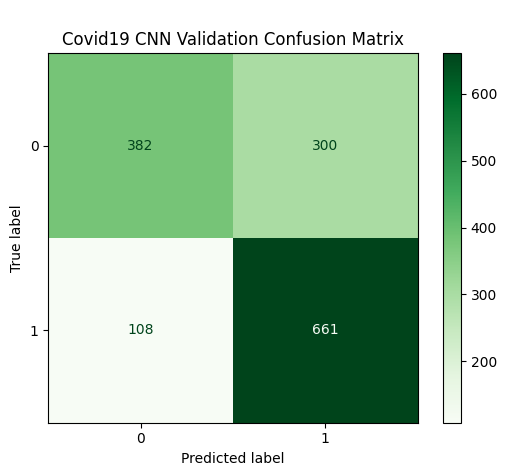

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       670
           1       0.71      0.86      0.78       782

    accuracy                           0.74      1452
   macro avg       0.75      0.73      0.73      1452
weighted avg       0.75      0.74      0.73      1452



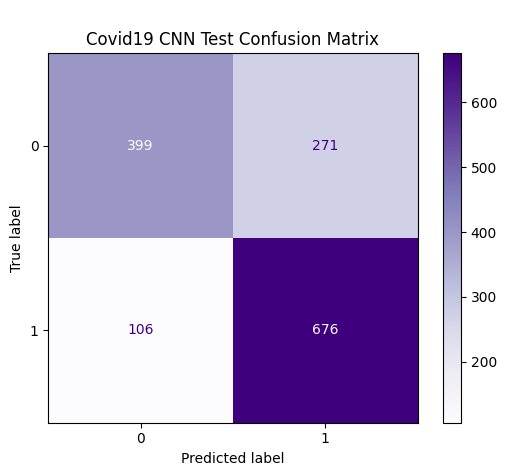

In [ ]:
import numpy as NewsDetNpp
import matplotlib.pyplot as Newsplt
from tensorflow.keras.models import Sequential as NewsDetSeqnt
from tensorflow.keras.optimizers import Adam as NewsDetAdmm
from sklearn.metrics import classification_report as NewsDetClfrpt
from sklearn.metrics import confusion_matrix as NewsDetCnMtrx
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, Flatten, Input
from sklearn.metrics import ConfusionMatrixDisplay as NewsDetDsp

NewsDetIp_shape = NewsDetX_tr.shape[1]

#======== Define CNN model for Covid19
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='tanh', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN 3 Layers Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()


4 layers

=============== Performance of CNN 4 Layers Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5462 - loss: 0.2459 - val_accuracy: 0.5693 - val_loss: 0.2437
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5878 - loss: 0.2386 - val_accuracy: 0.5479 - val_loss: 0.2535
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6172 - loss: 0.2317 - val_accuracy: 0.6568 - val_loss: 0.2142
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6421 - loss: 0.2154 - val_accuracy: 0.6678 - val_loss: 0.2077
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6481 - loss: 0.2167 - val_accuracy: 0.6134 - val_loss: 0.2251
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6323 - loss: 0.2181 - val_accuracy: 0.6120 - val_loss: 0.2331
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6556 - loss: 0.2097 - val_accuracy: 0.6699 - val_loss: 0.2103
Epoch 8/100
88/88 ━━━━━━━━━━

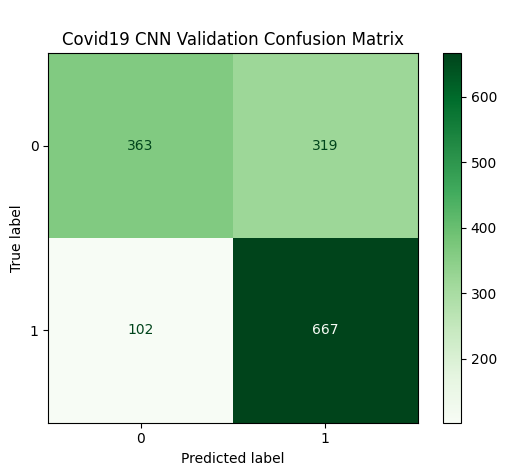

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.53      0.64       670
           1       0.69      0.89      0.78       782

    accuracy                           0.72      1452
   macro avg       0.75      0.71      0.71      1452
weighted avg       0.74      0.72      0.71      1452



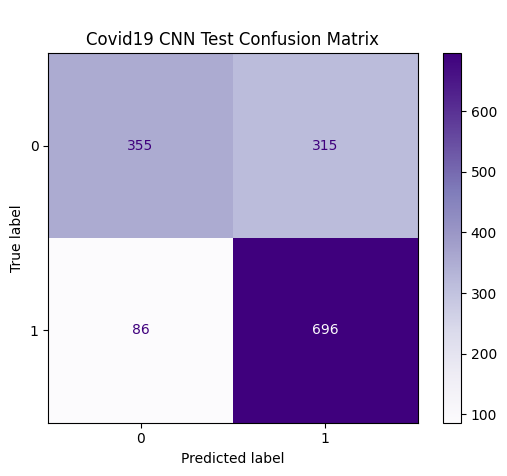

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='tanh', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN 4 Layers Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

5 layers

=============== Performance of CNN 5 Layers Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5343 - loss: 0.2466 - val_accuracy: 0.5920 - val_loss: 0.2385
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5924 - loss: 0.2360 - val_accuracy: 0.6251 - val_loss: 0.2249
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6298 - loss: 0.2220 - val_accuracy: 0.6237 - val_loss: 0.2225
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6091 - loss: 0.2297 - val_accuracy: 0.6292 - val_loss: 0.2195
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6431 - loss: 0.2179 - val_accuracy: 0.5975 - val_loss: 0.2328
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6173 - loss: 0.2242 - val_accuracy: 0.5892 - val_loss: 0.2373
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6436 - loss: 0.2143 - val_accuracy: 0.6692 - val_loss: 0.2065
Epoch 8/100
88/88 ━━━━━━━━━━

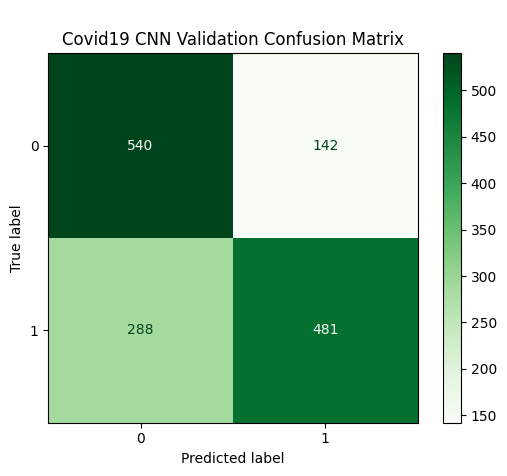

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       670
           1       0.79      0.62      0.70       782

    accuracy                           0.71      1452
   macro avg       0.72      0.72      0.71      1452
weighted avg       0.73      0.71      0.71      1452



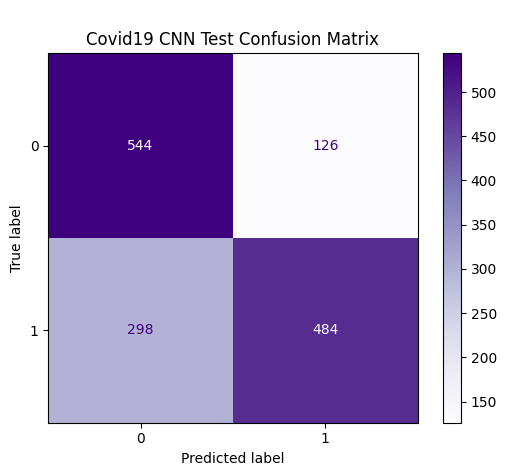

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='tanh', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN 5 Layers Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

Activation 'relu'

=============== Performance of CNN Activation 'relu' Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5178 - loss: 0.2492 - val_accuracy: 0.5948 - val_loss: 0.2373
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5995 - loss: 0.2356 - val_accuracy: 0.5996 - val_loss: 0.2295
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6160 - loss: 0.2274 - val_accuracy: 0.6685 - val_loss: 0.2103
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6245 - loss: 0.2222 - val_accuracy: 0.6527 - val_loss: 0.2152
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6636 - loss: 0.2115 - val_accuracy: 0.6623 - val_loss: 0.2084
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6770 - loss: 0.2058 - val_accuracy: 0.6788 - val_loss: 0.2007
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6844 - loss: 0.2005 - val_accuracy: 0.6189 - val_loss: 0.2372
Epoch 8/100
88/88 ━━━━

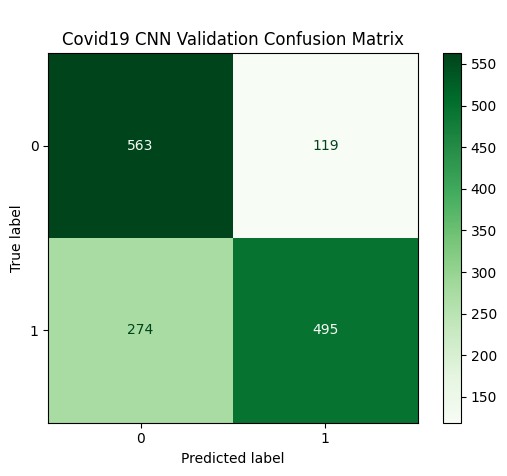

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.81      0.72       670
           1       0.79      0.64      0.71       782

    accuracy                           0.72      1452
   macro avg       0.73      0.72      0.72      1452
weighted avg       0.73      0.72      0.72      1452



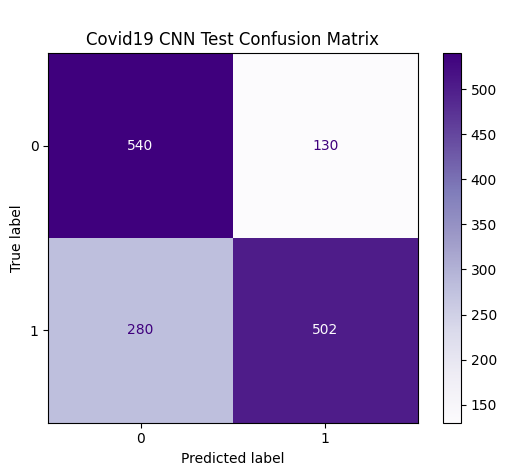

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN Activation 'relu' Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

Activation 'elu'

=============== Performance of CNN Activation 'elu' Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5216 - loss: 0.2482 - val_accuracy: 0.5644 - val_loss: 0.2411
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5949 - loss: 0.2350 - val_accuracy: 0.5431 - val_loss: 0.2389
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6223 - loss: 0.2274 - val_accuracy: 0.6409 - val_loss: 0.2244
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6217 - loss: 0.2259 - val_accuracy: 0.6726 - val_loss: 0.2065
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6702 - loss: 0.2085 - val_accuracy: 0.6699 - val_loss: 0.2079
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6285 - loss: 0.2231 - val_accuracy: 0.6768 - val_loss: 0.2037
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6686 - loss: 0.2034 - val_accuracy: 0.6809 - val_loss: 0.2076
Epoch 8/100
88/88 ━━━

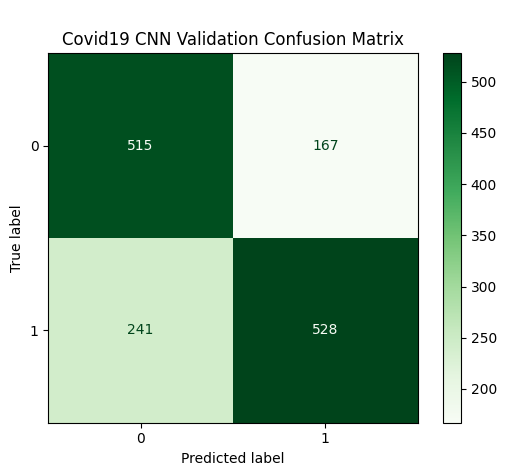

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       670
           1       0.79      0.67      0.73       782

    accuracy                           0.73      1452
   macro avg       0.73      0.73      0.73      1452
weighted avg       0.73      0.73      0.73      1452



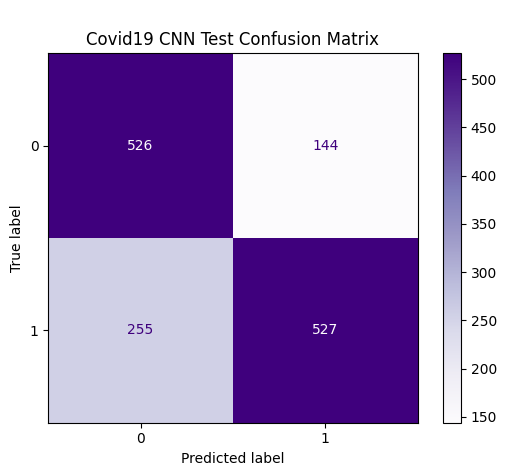

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='elu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='elu'),
    Dense(128, activation='elu'),
    Dense(64, activation='elu'),
    Dense(128, activation='elu'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN Activation 'elu' Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

Optimizer 'adamW'

=============== Performance of CNN Optimizer 'adamW' Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5224 - loss: 0.2490 - val_accuracy: 0.6113 - val_loss: 0.2359
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5961 - loss: 0.2367 - val_accuracy: 0.6389 - val_loss: 0.2255
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6236 - loss: 0.2243 - val_accuracy: 0.6527 - val_loss: 0.2216
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6468 - loss: 0.2222 - val_accuracy: 0.6671 - val_loss: 0.2111
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6464 - loss: 0.2161 - val_accuracy: 0.6589 - val_loss: 0.2127
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6640 - loss: 0.2125 - val_accuracy: 0.5748 - val_loss: 0.2369
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6814 - loss: 0.1993 - val_accuracy: 0.6830 - val_loss: 0.2027
Epoch 8/100
88/88 

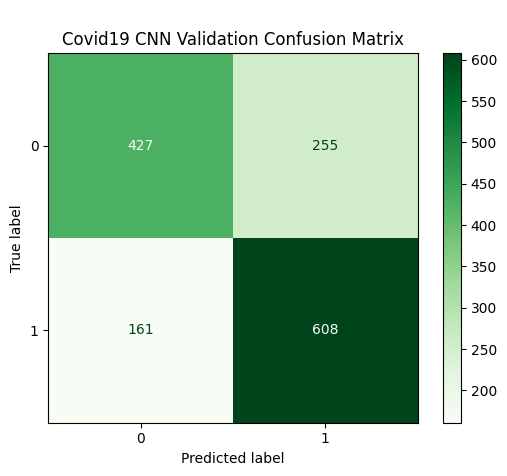

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.63      0.67       670
           1       0.71      0.80      0.75       782

    accuracy                           0.72      1452
   macro avg       0.72      0.71      0.71      1452
weighted avg       0.72      0.72      0.72      1452



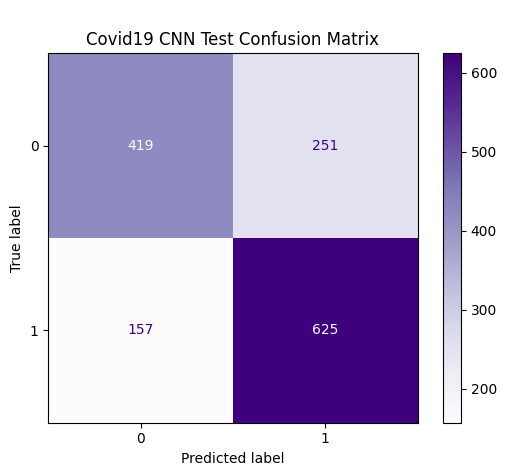

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adamW', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN Optimizer 'adamW' Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

Optimizer 'rmsprop'

=============== Performance of CNN Optimizer 'rmsprop' Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5225 - loss: 0.2493 - val_accuracy: 0.5231 - val_loss: 0.2478
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5699 - loss: 0.2438 - val_accuracy: 0.5562 - val_loss: 0.2476
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6033 - loss: 0.2353 - val_accuracy: 0.6265 - val_loss: 0.2284
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6260 - loss: 0.2255 - val_accuracy: 0.6382 - val_loss: 0.2224
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6311 - loss: 0.2222 - val_accuracy: 0.5059 - val_loss: 0.2743
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6379 - loss: 0.2188 - val_accuracy: 0.5927 - val_loss: 0.2372
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6395 - loss: 0.2184 - val_accuracy: 0.5693 - val_loss: 0.2514
Epoch 8/100
88/88 ━━━

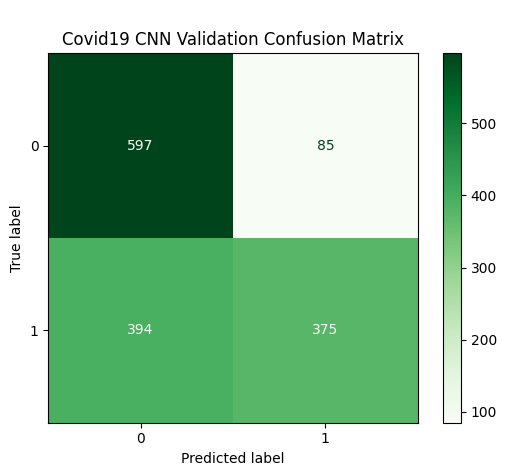

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.86      0.70       670
           1       0.81      0.49      0.61       782

    accuracy                           0.66      1452
   macro avg       0.70      0.67      0.65      1452
weighted avg       0.71      0.66      0.65      1452



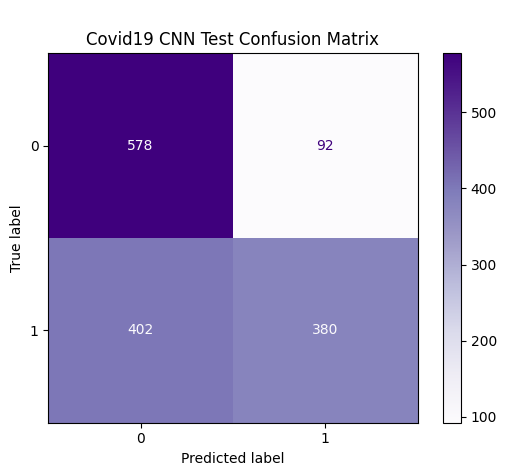

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN Optimizer 'rmsprop' Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

1. using 3 different hidden layers (3, 4, 5) and this have the activation (tanh), optimizer (adam).
2. take the best layer of 4 and hypertuning the activation (relu) and (elu).
3. take the best activation 'relu' and hypertuning the optimizers (adamW) and (rmsprop).